In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

In [4]:
# load the data from a local CSV file
data = pd.read_csv("C:/Users/user/Documents/GitHub/R5D5-Project/model/ML_Model_Dataset_01/complete_data_model_nba2k_main_data_sheet.csv")

In [5]:
data.head()

rating  height  weight    salary  draft_year  draft_round  draft_peak  \
0      81    2.03    99.8  0.433265        2014            1           4   
1      73    1.83    83.9  0.047871        2018            1          23   
2      70    1.96   102.1  0.034299        2016            2          58   
3      71    1.96   109.3  0.020774        2019            2          42   
4      85    2.06   111.6  0.611183        2007            1           3   

   TWITTER_FAVORITE_COUNT  TWITTER_RETWEET_COUNT  \
0               42.500000              16.000000   
1              583.257282             198.997573   
2              583.257282             198.997573   
3              583.257282             198.997573   
4              136.000000              71.000000   

   TWITTER_FOLLOWER_COUNT_MILLIONS  ...  team_salary  position_C  \
0                         2.850071  ...            4           0   
1                         2.850071  ...            2           0   
2                         2.850071  ...            6           0   
3                         2.850071  ...            6           0   
4                         0.253000  ...            6           0   

   position_C-F  position_F  position_F-C  position_F-G  position_G  \
0             0           1             0             0           0   
1             0           0             0             0           1   
2             0           1             0             0           0   
3             0           1             0             0           0   
4             1           0             0             0           0   

   position_G-F  country_USA  country_not USA  
0             0            1                0  
1             0            1                0  
2             0            0                1  
3             0            1                0  
4             0            0                1  

[5 rows x 23 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   rating                           464 non-null    int64  
 1   height                           464 non-null    float64
 2   weight                           464 non-null    float64
 3   salary                           464 non-null    float64
 4   draft_year                       464 non-null    int64  
 5   draft_round                      464 non-null    int64  
 6   draft_peak                       464 non-null    int64  
 7   TWITTER_FAVORITE_COUNT           464 non-null    float64
 8   TWITTER_RETWEET_COUNT            464 non-null    float64
 9   TWITTER_FOLLOWER_COUNT_MILLIONS  464 non-null    float64
 10  Experience                       464 non-null    float64
 11  Age                              464 non-null    float64
 12  bmi                   

In [7]:
# split the data into training and testing sets
X = data.drop('salary', axis=1)
y = data['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# create a Gradient Boosting Regressor model
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)


In [9]:
# train the model on the training set
gb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=0)

In [10]:
# get the feature importance scores
feature_importance = gb.feature_importances_


In [16]:
# create a dictionary of feature importances
importances = dict(zip(X.columns, feature_importance))

# sort the dictionary by values in descending order
importances_sorted = {k: v for k, v in sorted(importances.items(), key=lambda item: item[1], reverse=True)}

# print the feature importances in descending order
print("Feature Importances (high to low):")
for feature, importance in importances_sorted.items():
    print(f"{feature}: {importance*100:.2f}%")


Feature Importances (high to low):
rating: 69.42%
draft_year: 9.93%
TWITTER_FOLLOWER_COUNT_MILLIONS: 4.77%
Experience: 4.30%
Age: 2.63%
TWITTER_FAVORITE_COUNT: 2.17%
weight: 2.07%
TWITTER_RETWEET_COUNT: 1.35%
draft_peak: 1.09%
bmi: 0.95%
height: 0.53%
team_salary: 0.32%
position_F: 0.13%
draft_round: 0.13%
position_F-C: 0.09%
position_F-G: 0.06%
position_G-F: 0.03%
country_not USA: 0.01%
position_C: 0.01%
position_C-F: 0.00%
position_G: 0.00%
country_USA: 0.00%


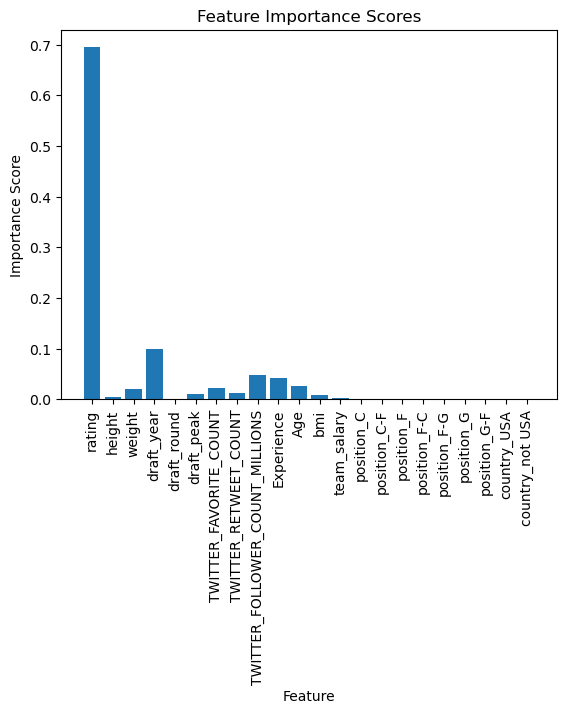

In [14]:
# plot the feature importances
plt.bar(range(X.shape[1]), feature_importance)
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Feature Importance Scores')
plt.show()